In [48]:
import datetime as dt
import pandas_datareader.data as web
import numpy as np
#Define your Start and End Dates
start = dt.datetime(2000,8,15)
end = dt.datetime(2018,8,15)

#except for 'yahoo', other sources are 'Robinhood', 'MorningStar' API
df = web.DataReader('IBM', 'yahoo', start='1990/1/30')
df.head()



,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1990-01-29,24.43750,23.87500,24.34375,24.31250,5153600.0,6.623616
1990-01-30,24.40625,23.93750,24.34375,24.31250,8646800.0,6.623616
1990-01-31,24.65625,24.40625,24.50000,24.65625,8452000.0,6.717267
1990-02-01,24.93750,24.43750,24.65625,24.43750,6903600.0,6.657670
1990-02-02,24.68750,24.46875,24.46875,24.59375,6064400.0,6.700242


In [36]:
vix  = web.DataReader('VIXCLS', 'fred')
vix.head()

,VIXCLS
DATE,
2010-01-01,NaN
2010-01-04,20.04
2010-01-05,19.35
2010-01-06,19.16
2010-01-07,19.06


In [24]:
import pandas as pd

In [43]:
factors = web.DataReader("F-F_Research_Data_5_Factors_2x3_daily", "famafrench",start='1990/1/30')[0]
#factors.index = pd.to_datetime(factors.index, format="%Y%m%d", utc=True)
factors.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
1990-01-30,-0.90,-0.69,0.58,-0.30,0.12,0.026
1990-01-31,1.67,-1.22,-0.18,-0.02,-0.05,0.026
1990-02-01,0.08,0.56,-0.04,-0.21,-0.03,0.030
1990-02-02,0.73,0.30,-0.54,-0.13,0.11,0.030
1990-02-05,0.38,0.22,-0.30,0.04,-0.23,0.030


In [51]:
factors = web.DataReader("F-F_Research_Data_5_Factors_2x3", "famafrench",start='1970/1/30')[0]
#factors.index = pd.to_datetime(factors.index, format="%Y%m", utc=True)
factors.tail()

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2018-02,-3.65,0.38,-1.20,0.72,-2.25,0.11
2018-03,-2.35,3.54,-0.08,-0.51,-0.03,0.12
2018-04,0.29,0.90,0.50,-1.97,1.19,0.14
2018-05,2.65,4.76,-3.13,-1.74,-1.35,0.14
2018-06,0.48,0.84,-2.41,0.98,0.32,0.14


In [50]:
mom = web.DataReader("F-F_Momentum_Factor", "famafrench",start='1970/1/30')[0]
#factors.index = pd.to_datetime(factors.index, format="%Y%m", utc=True)
mom.tail()

,Mom
Date,
2018-02,3.98
2018-03,-1.25
2018-04,0.27
2018-05,3.76
2018-06,-2.54


In [92]:
factors['MOM'] = mom
factors.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF,MOM
Date,,,,,,,
1970-01,-8.10,3.07,3.04,-2.00,3.92,0.60,0.63
1970-02,5.13,-2.59,4.04,-2.19,3.06,0.62,0.12
1970-03,-1.06,-2.42,4.25,-1.02,4.43,0.57,-0.29
1970-04,-11.00,-6.30,6.39,-1.01,5.88,0.50,-0.73
1970-05,-6.92,-4.43,3.60,-1.39,3.62,0.53,-2.73


In [96]:
factors['MOM'].describe()

count    582.000000
mean       0.636117
std        4.339966
min      -34.390000
25%       -0.872500
50%        0.745000
75%        2.880000
max       18.330000
Name: MOM, dtype: float64

In [97]:
#Plot the rolling 3-year annualised excess return
factors['Mkt-RF3Y'] = (factors['Mkt-RF']).rolling(36).mean()
factors['HML3Y'] = (factors['HML']).rolling(36).mean()
factors['RMW3Y'] = (factors['RMW']).rolling(36).mean()
factors['CMA3Y'] = (factors['CMA']).rolling(36).mean()
factors['MOM3Y'] = (factors['MOM']).rolling(36).mean()

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline

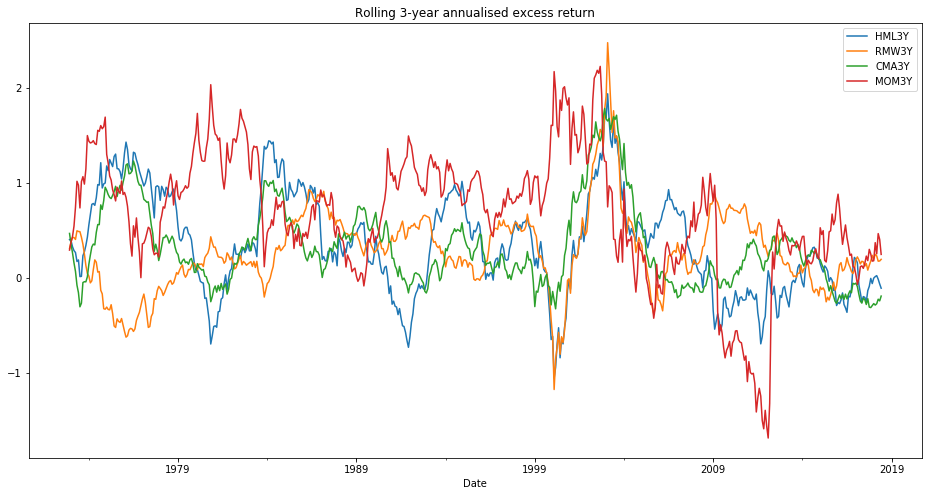

In [104]:
#factors['Mkt-RF3Y'].plot(figsize=(16,8))
factors['HML3Y'].plot(figsize=(16,8))
factors['RMW3Y'].plot()
factors['CMA3Y'].plot()
factors['MOM3Y'].plot()
plt.title('Rolling 3-year annualised excess return')
plt.legend()


In [106]:
# Cumulative return
factors['HML_cumulative_return'] = (factors['HML']/100+1).cumprod()
factors['RMW_cumulative_return'] = (factors['RMW']/100+1).cumprod()
factors['CMA_cumulative_return'] = (factors['CMA']/100+1).cumprod()
factors['MOM_cumulative_return'] = (factors['MOM']/100+1).cumprod()

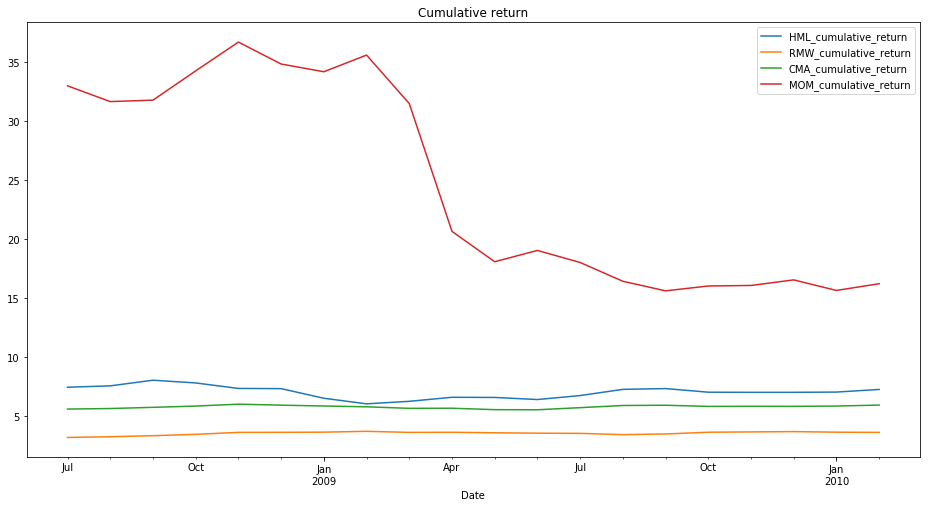

In [118]:
# Plot Cumulative return
factors['HML_cumulative_return'][-120:-100].plot(figsize=(16,8))
factors['RMW_cumulative_return'][-120:-100].plot()
factors['CMA_cumulative_return'][-120:-100].plot()
factors['MOM_cumulative_return'][-120:-100].plot()
plt.title('Cumulative return')
plt.legend()